# Visualization with ArcGIS
 1. Smart mapping - lines - vary by symbol size
 2. Smart mapping - polygons - vary by symbol color
   - definition queries
 3. Smart mapping - points - vary by density
 4. Visualizing imagery layers - dynamic raster function

## Smart mapping of line features

In [77]:
from arcgis.gis import *
gis = GIS()

In [78]:
map1 = gis.map('USA',4)
map1

In [86]:
map1.basemap='gray-vector'

In [85]:
map1.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

Let us search for an item titled **USA Freeway System** by **Esri** and add that to the map

In [79]:
search_result = gis.content.search('title:USA freeway system AND owner:esri', 
                                  item_type = 'Feature Layer')
search_result

[<Item title:"USA Freeway System" type:Feature Layer Collection owner:esri>]

In [80]:
freeway_item = search_result[0]
map1.add_layer(freeway_item)

#### Display the fields

In [81]:
freeway_item.layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Freeway_System/FeatureServer/1">,
 <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Freeway_System/FeatureServer/2">]

In [82]:
# Use the first layer available on the service.
freeway_feature_layer = freeway_item.layers[0]

# Print the layer's url and field names.
print(freeway_feature_layer.url)
for field in freeway_feature_layer.properties['fields']:
    print(field['name'] + " \t: " + field['type'])

https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Freeway_System/FeatureServer/1
OBJECTID 	: esriFieldTypeOID
ROUTE_NUM 	: esriFieldTypeString
CLASS 	: esriFieldTypeString
NUMBER 	: esriFieldTypeString
SUFFIX 	: esriFieldTypeString
DIST_MILES 	: esriFieldTypeDouble
DIST_KM 	: esriFieldTypeDouble


In [83]:
map1.add_layer(freeway_feature_layer, {"renderer":"ClassedSizeRenderer", "field_name": "DIST_MILES"})

In [ ]:
# Change map's extent to San Diego, CA
map1.center = [32.715, -117.1]

In [ ]:
map1.zoom = 10

## Visualizing area features
### Use definition queries to limit data during rendering

In [87]:
map2 = gis.map('California', 6)

In [88]:
map2

In [92]:
county_feature_layer = county_item.layers[0]
for field in county_feature_layer.properties.fields:
    print(field['name'] + " \t: " + field['type'])

FID 	: esriFieldTypeOID
NAME 	: esriFieldTypeString
STATE_NAME 	: esriFieldTypeString
POP2010 	: esriFieldTypeInteger
POP10_SQMI 	: esriFieldTypeDouble
POP2012 	: esriFieldTypeInteger
POP12_SQMI 	: esriFieldTypeDouble
WHITE 	: esriFieldTypeInteger
BLACK 	: esriFieldTypeInteger
AMERI_ES 	: esriFieldTypeInteger
ASIAN 	: esriFieldTypeInteger
HAWN_PI 	: esriFieldTypeInteger
HISPANIC 	: esriFieldTypeInteger
OTHER 	: esriFieldTypeInteger
MULT_RACE 	: esriFieldTypeInteger
MALES 	: esriFieldTypeInteger
FEMALES 	: esriFieldTypeInteger
AGE_UNDER5 	: esriFieldTypeInteger
AGE_5_9 	: esriFieldTypeInteger
AGE_10_14 	: esriFieldTypeInteger
AGE_15_19 	: esriFieldTypeInteger
AGE_20_24 	: esriFieldTypeInteger
AGE_25_34 	: esriFieldTypeInteger
AGE_35_44 	: esriFieldTypeInteger
AGE_45_54 	: esriFieldTypeInteger
AGE_55_64 	: esriFieldTypeInteger
AGE_65_74 	: esriFieldTypeInteger
AGE_75_84 	: esriFieldTypeInteger
AGE_85_UP 	: esriFieldTypeInteger
MED_AGE 	: esriFieldTypeDouble
MED_AGE_M 	: esriFieldTypeDoub

In [93]:
county_fset = county_feature_layer.query()
county_df = county_fset.df
county_df.head(5)

AGE_10_14  AGE_15_19  AGE_20_24  AGE_25_34  AGE_35_44  AGE_45_54  \
0        206        248        137        349        413        747   
1        715        722        537       1189       1196       1969   
2        430        543        402        652        741       1152   
3       1539       2104       2000       2480       2791       3294   
4        988        853        601       1606       1684       2128   

   AGE_55_64  AGE_5_9  AGE_65_74  AGE_75_84  \
0        691      224        448        260   
1       1783      676       1133        974   
2       1439      376        900        375   
3       3002     1460       2153       1319   
4       2131      950       1383       1010   

                         ...                          POP10_SQMI  POP12_SQMI  \
0                        ...                                 2.3    2.300010   
1                        ...                                20.9   21.088836   
2                        ...                                 3.3    3.450140   
3                        ...                                55.2   55.655913   
4                        ...                                25.6   25.901087   

   POP2010  POP2012  RENTER_OCC     SQMI  STATE_NAME  VACANT  WHITE  \
0     4045     4083         305  1775.21   Minnesota    1888   3874   
1    12072    12171        1260   577.13        Iowa     570  11667   
2     7551     7788         895  2257.30  Washington    1213   5758   
3    24276    24463        1909   439.54        Iowa     530  23601   
4    14867    15062        1126   581.52        Iowa     562  14636   

                                               SHAPE  
0  {'rings': [[[-10613515.4319242, 6198289.496555...  
1  {'rings': [[[-10619580.1613708, 5245695.162684...  
2  {'rings': [[[-13230502.7979313, 6098468.131349...  
3  {'rings': [[[-10303440.2910798, 5256961.647385...  
4  {'rings': [[[-10356126.0981435, 5244010.435660...  

[5 rows x 52 columns]

In [ ]:
county_df.STATE_NAME.unique()

In [ ]:
county_df.shape

#### Smart mapping - symbolize by colors

In [94]:
map3 = gis.map('USA', zoomlevel=4)
map3

In [95]:
map3.add_layer(county_item, {'renderer':'ClassedColorRenderer',
                             'field_name':'POP2012',
                             'opacity':0.6})

In [96]:
map4 = gis.map('California', zoomlevel=6)
map4

In [97]:
map4.add_layer(county_item, {"type":"FeatureLayer",
                             "definition_expression" : "STATE_NAME='California'",
                             "renderer":"ClassedColorRenderer",
                             "field_name":"POP2012","opacity":0.7
              })

## Visualizing location data

In [98]:
map3 = gis.map('Los Angeles', 8)

In [99]:
map3

In [ ]:
map3.save({})

In [100]:
gis2 = GIS("https://python.playground.esri.com/portal","arcgis_python","amazing_arcgis_123")
eq_list = gis2.content.search('title:earthquakes_2', 'feature layer')
eq_list

[<Item title:"earthquakes_2" type:Feature Layer Collection owner:arcgis_python>]

In [101]:
map3.add_layer(eq_list[0], {"type":"FeatureLayer",
                "renderer":"HeatmapRenderer"})

## Visualizing imagery layers

In [102]:
landsat_items = gis.content.search("Landsat 8 Views", item_type="Imagery Layer", max_items=2)
landsat_items

[<Item title:"Landsat 8 Views" type:Imagery Layer owner:esri>,
 <Item title:"MDA NaturalVue Satellite Imagery" type:Imagery Layer owner:esri>]

In [103]:
l8_views = landsat_items[0]
l8_views

<Item title:"Landsat 8 Views" type:Imagery Layer owner:esri>

In [104]:
l8_lyr = l8_views.layers[0]
l8_lyr.url

'https://landsat2.arcgis.com/arcgis/rest/services/Landsat8_Views/ImageServer'

#### Quick viz of imagery layers

In [106]:
type(l8_lyr)

arcgis.raster._layer.ImageryLayer

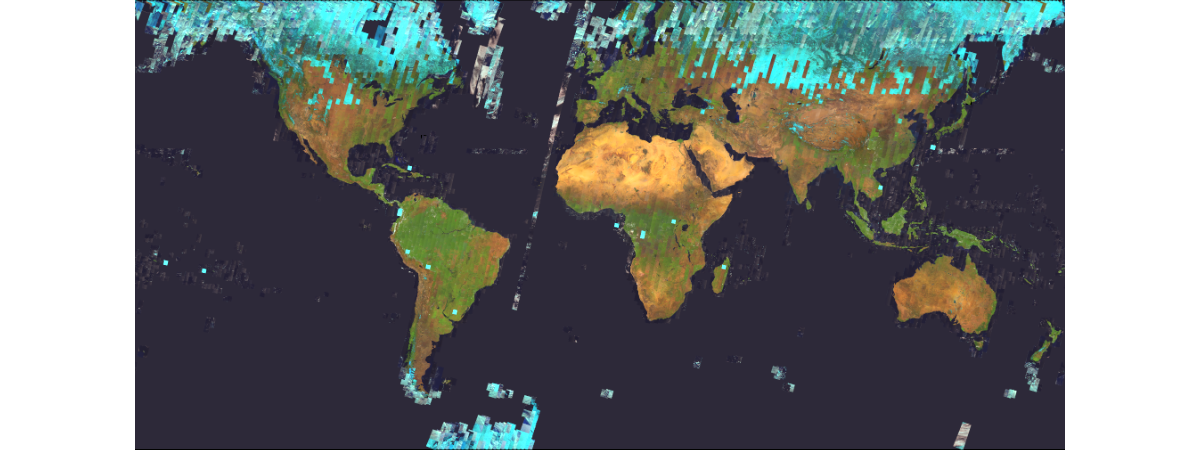

In [105]:
l8_lyr

In [107]:
for fn in l8_lyr.properties.rasterFunctionInfos:
    print(fn['name'])

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Geology with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
None


In [108]:
marsh_map = gis.map("Pallikaranai", zoomlevel=13)
marsh_map

In [ ]:
marsh_map.remove_layers()

In [109]:
import time
from arcgis.raster.functions import apply

for fn in l8_lyr.properties.rasterFunctionInfos:
    print(fn['name'])
#     marsh_map.remove_layers()
    marsh_map.add_layer(apply(l8_lyr, fn['name']))
    time.sleep(2)

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Geology with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
None


### Computation using raster functions

SAVI - The Soil-Adjusted Vegetation Index (SAVI) is a vegetation index that attempts to minimize soil brightness influences using a soil-brightness correction factor. This is often used in arid regions where vegetative cover is low. SAVI is computed as below, where L is the vegetation correction factor and varies from 1 to 0. A value L = 1 is used for no vegetation cover and L=0 for high vegetation cover.

    SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)

In [110]:
savi_map = gis.map("Cairo", zoomlevel=6)
savi_map

In [111]:
from arcgis.raster.functions import savi
savi_map.add_layer(l8_lyr)

In [112]:
savi_map.add_layer(savi(l8_lyr, band_indexes="5 4 0.3"))